In [819]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-ml-challenge-pet-adoption/train.csv
/kaggle/input/hackerearth-ml-challenge-pet-adoption/test.csv


In [820]:
#Reading the csv files
train=pd.read_csv("../input/hackerearth-ml-challenge-pet-adoption/train.csv")
test=pd.read_csv("../input/hackerearth-ml-challenge-pet-adoption/test.csv")


In [821]:
#checking shape
print("train",train.shape)
print("test",test.shape)

train (18834, 11)
test (8072, 9)


In [822]:
#looking head of the data
train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2


In [823]:
test.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1


In [824]:
#checking for datatypes
print(train.dtypes)
print("*"*30)
print(test.dtypes)
print("*"*30)


pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type         object
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object
******************************
pet_id           object
issue_date       object
listing_date     object
condition       float64
color_type       object
length(m)       float64
height(cm)      float64
X1                int64
X2                int64
dtype: object
******************************


In [825]:
#checking for info
print(train.info())
print("*"*30)
print(test.info())
print("*"*30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB
None
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id     

In [826]:
#checking for missing values
print(train.isnull().sum())
print("*"*30)
print(test.isnull().sum())
print("*"*30)


pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64
******************************
pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64
******************************


In [827]:
print(train['breed_category'][(np.isnan(train['condition']))].value_counts())
print("*"*30)
print(train['pet_category'][(np.isnan(train['condition']))].value_counts())

2.0    1477
Name: breed_category, dtype: int64
******************************
4    783
1    583
2     60
0     51
Name: pet_category, dtype: int64


In [828]:
#converting datatype
train[['color_type', 'breed_category','pet_category']] =train[['color_type', 'breed_category','pet_category']].astype('category')
test[['color_type']]=train[['color_type']].astype('category')
print(train.dtypes) 
print("*"*30)
print(test.dtypes)

pet_id              object
issue_date          object
listing_date        object
condition          float64
color_type        category
length(m)          float64
height(cm)         float64
X1                   int64
X2                   int64
breed_category    category
pet_category      category
dtype: object
******************************
pet_id            object
issue_date        object
listing_date      object
condition        float64
color_type      category
length(m)        float64
height(cm)       float64
X1                 int64
X2                 int64
dtype: object


now we are left with issue date and listing date.we will convert it into datetime


In [829]:
#converting datatype
train['issue_date']=pd.to_datetime(train['issue_date'])
train['listing_date']=pd.to_datetime(train['listing_date'])

test['issue_date']=pd.to_datetime(test['issue_date'])
test['listing_date']=pd.to_datetime(test['listing_date'])

print(train.dtypes) 
print("*"*30)
print(test.dtypes)

pet_id                    object
issue_date        datetime64[ns]
listing_date      datetime64[ns]
condition                float64
color_type              category
length(m)                float64
height(cm)               float64
X1                         int64
X2                         int64
breed_category          category
pet_category            category
dtype: object
******************************
pet_id                  object
issue_date      datetime64[ns]
listing_date    datetime64[ns]
condition              float64
color_type            category
length(m)              float64
height(cm)             float64
X1                       int64
X2                       int64
dtype: object


In [830]:
#target variable value count
print(train['breed_category'].value_counts())
print(train['pet_category'].value_counts())

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64
2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64


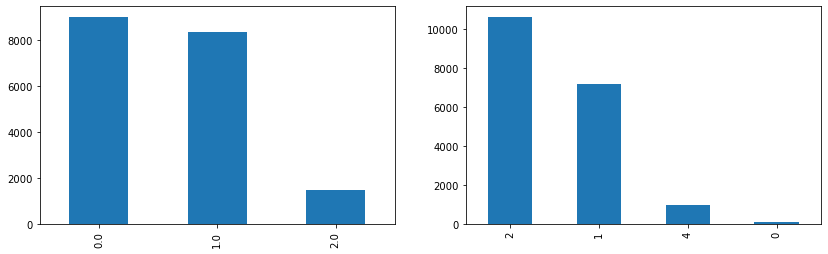

In [831]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (14,4))
train['breed_category'].value_counts().plot.bar(ax = ax1)
train['pet_category'].value_counts().plot.bar(ax = ax2)

In [832]:
#replace missing values
train['condition'].fillna(-1,inplace=True)
test['condition'].fillna(-1,inplace=True)
print(train.isnull().any().sum())
print(test.isnull().any().sum())


0
0


In [833]:
train['pet_id_1'] = train['pet_id'].str[:6]
train['pet_id_2'] = train['pet_id'].str[:7]

test['pet_id_1'] = test['pet_id'].str[:6]
test['pet_id_2'] = test['pet_id'].str[:7]

In [834]:
print(train['pet_id_1'].nunique())
print(train['pet_id_2'].nunique())

4
28


In [835]:
print(train.groupby(['pet_id_1', 'pet_category']).size())
print(train.groupby(['pet_id_2', 'breed_category']).size())

pet_id_1  pet_category
ANSL_4    0                  0
          1                  8
          2                  8
          4                  1
ANSL_5    0                 27
          1               2689
          2               3918
          4                365
ANSL_6    0                 39
          1               2735
          2               3877
          4                354
ANSL_7    0                 22
          1               1752
          2               2818
          4                221
dtype: int64
pet_id_2  breed_category
ANSL_49   0.0                11
          1.0                 5
          2.0                 1
ANSL_50   0.0               321
          1.0               310
                           ... 
ANSL_75   1.0               280
          2.0                45
ANSL_76   0.0               297
          1.0               308
          2.0                22
Length: 84, dtype: int64


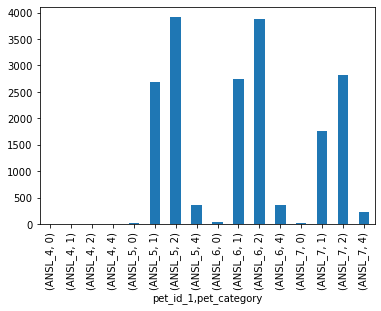

In [836]:

train.groupby(['pet_id_1', 'pet_category']).size().plot.bar()


In [837]:
train['issue_year'] = train["issue_date"].dt.year
train['listing_year'] = train["listing_date"].dt.year

train['issue_month'] = train["issue_date"].dt.month
train['listing_month'] = train["listing_date"].dt.month

train['issue_day'] = train["issue_date"].dt.day
train['listing_day'] = train["listing_date"].dt.day

train['issue_quarter'] = train['issue_date'].dt.quarter
train['listing_quarter'] = train['listing_date'].dt.quarter

train['issue_dayofweek'] = train['issue_date'].dt.dayofweek
train['listing_dayofweek'] = train['listing_date'].dt.dayofweek

train['issue_is_weekend'] = np.where(train['issue_dayofweek'].isin([5,6]),1,0)
train['listing_is_weekend'] = np.where(train['listing_dayofweek'].isin([5,6]),1,0)

In [838]:
test['issue_year'] = test["issue_date"].dt.year
test['listing_year'] = test["listing_date"].dt.year

test['issue_month'] = test["issue_date"].dt.month
test['listing_month'] = test["listing_date"].dt.month

test['issue_day'] = test["issue_date"].dt.day
test['listing_day'] = test["listing_date"].dt.day

test['issue_quarter'] = test['issue_date'].dt.quarter
test['listing_quarter'] = test['listing_date'].dt.quarter

test['issue_dayofweek'] = test['issue_date'].dt.dayofweek
test['listing_dayofweek'] = test['listing_date'].dt.dayofweek

test['issue_is_weekend'] = np.where(test['issue_dayofweek'].isin([5,6]),1,0)
test['listing_is_weekend'] = np.where(test['listing_dayofweek'].isin([5,6]),1,0)

In [839]:
train['length(m)'].value_counts()

0.08    216
0.60    213
0.44    210
0.30    209
0.85    208
       ... 
0.68    163
0.34    157
0.17    147
1.00    107
0.00     93
Name: length(m), Length: 101, dtype: int64

length value with zero does not make any sense to data.we will try to replace it

In [840]:
#converting meters to centimeters
#convert length(m) to length(cm)
train['length(cm)'] = train['length(m)'].apply(lambda x: x*100)
test['length(cm)'] = test['length(m)'].apply(lambda x: x*100)

train.drop('length(m)', axis=1, inplace=True)
test.drop('length(m)', axis=1, inplace=True)

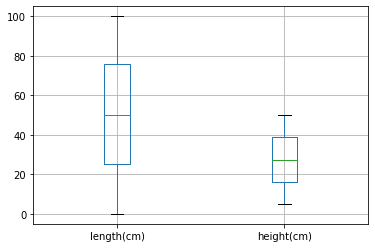

In [841]:
train[['length(cm)','height(cm)']].boxplot()

In [842]:
# replace all 0 length with mean of lengths
val = train['length(cm)'].mean()
train['length(cm)'] = train['length(cm)'].replace(to_replace=0, value=val)
test['length(cm)'] = test['length(cm)'].replace(to_replace=0, value=val)

In [843]:
print(len(train[train['length(cm)'] == 0]))
print(len(test[test['length(cm)']==0]))

0
0


In [844]:
#taking duration
train['duration']=abs(train['listing_date']-train['issue_date'])
print(train['duration'][:5])


test['duration']=abs(test['listing_date']-test['issue_date'])
print(test['duration'][:5])


0     73 days 16:25:00
1   1862 days 17:47:00
2    752 days 08:24:00
3    755 days 18:30:00
4     52 days 09:38:00
Name: duration, dtype: timedelta64[ns]
0   4404 days 15:35:00
1    174 days 17:24:00
2   1999 days 16:51:00
3   1148 days 07:25:00
4    463 days 13:42:00
Name: duration, dtype: timedelta64[ns]


In [845]:
#considering only no of days ---duration of days
train['duration'] = train['duration'].dt.days
print(train['duration'][:5])

test['duration'] = test['duration'].dt.days
print(test['duration'][:5])

0      73
1    1862
2     752
3     755
4      52
Name: duration, dtype: int64
0    4404
1     174
2    1999
3    1148
4     463
Name: duration, dtype: int64


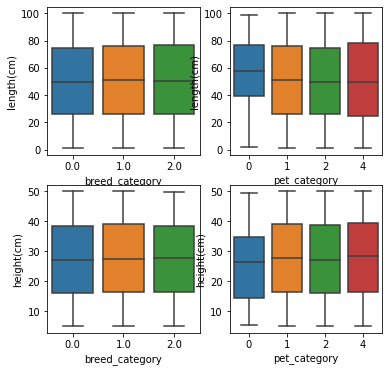

In [846]:
#visualizing breed_category,pet_category with length and height
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (6,6))
sns.boxplot(train['breed_category'],train['length(cm)'],ax = ax1)
sns.boxplot(train['pet_category'],train['length(cm)'],ax = ax2)
sns.boxplot(train['breed_category'],train['height(cm)'],ax = ax3)
sns.boxplot(train['pet_category'],train['height(cm)'],ax = ax4)

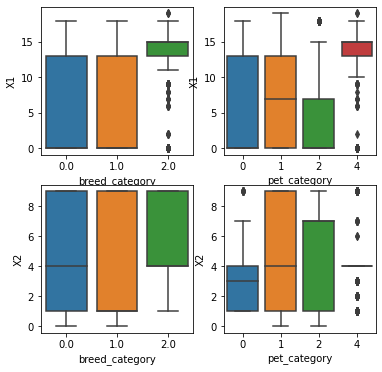

In [847]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (6,6))
sns.boxplot(train['breed_category'],train['X1'],ax = ax1)
sns.boxplot(train['pet_category'],train['X1'],ax = ax2)
sns.boxplot(train['breed_category'],train['X2'],ax = ax3)
sns.boxplot(train['pet_category'],train['X2'],ax = ax4)

In [848]:
#converting to dummies
dummy1 = pd.get_dummies(train['color_type'])
dummy2 = pd.get_dummies(train['pet_id_1'])
dummy3 = pd.get_dummies(train['pet_id_2'])


dummy11 = pd.get_dummies(test['color_type'])
dummy21 = pd.get_dummies(test['pet_id_1'])
dummy31 = pd.get_dummies(test['pet_id_2'])

#checking for shape
print(dummy1.shape,dummy2.shape,dummy3.shape)
print(dummy11.shape,dummy21.shape,dummy31.shape)

(18834, 56) (18834, 4) (18834, 28)
(8072, 56) (8072, 4) (8072, 28)


In [849]:
train_n = pd.concat([train,dummy1,dummy2,dummy3], axis=1)
test_n = pd.concat([test,dummy11,dummy21,dummy31], axis=1)


In [850]:
train_nn=train_n.drop(['color_type','pet_id_1','pet_id_2'],axis=1,inplace=True)

In [851]:
testnn=test_n.drop(['color_type','pet_id_1','pet_id_2'], axis=1,inplace=True)


In [852]:
testnn

In [853]:
print(train_n.head(2))
print(test_n.head(2))
print(train_n.shape,test_n.shape)

       pet_id issue_date        listing_date  condition  height(cm)  X1  X2  \
0  ANSL_69903 2016-07-10 2016-09-21 16:25:00        2.0        7.78  13   9   
1  ANSL_66892 2013-11-21 2018-12-27 17:47:00        1.0       14.19  13   9   

  breed_category pet_category  issue_year  ...  ANSL_67  ANSL_68  ANSL_69  \
0            0.0            1        2016  ...        0        0        1   
1            0.0            2        2013  ...        0        0        0   

   ANSL_70  ANSL_71  ANSL_72  ANSL_73  ANSL_74  ANSL_75  ANSL_76  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  

[2 rows x 111 columns]
       pet_id issue_date        listing_date  condition  height(cm)  X1  X2  \
0  ANSL_75005 2005-08-17 2017-09-07 15:35:00        0.0       42.73   0   7   
1  ANSL_76663 2018-11-15 2019-05-08 17:24:00        1.0        6.71   0   1   

   issue_year  listing_year  issue_month  ...  ANSL_67  ANSL_68  AN

there is a difference in the column number,we will try to check the columns




In [854]:
train_n

,pet_id,issue_date,listing_date,condition,height(cm),X1,X2,breed_category,pet_category,issue_year,...,ANSL_67,ANSL_68,ANSL_69,ANSL_70,ANSL_71,ANSL_72,ANSL_73,ANSL_74,ANSL_75,ANSL_76
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,7.78,13,9,0.0,1,2016,...,0,0,1,0,0,0,0,0,0,0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,14.19,13,9,0.0,2,2013,...,0,0,0,0,0,0,0,0,0,0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,-1.0,40.90,15,4,2.0,4,2014,...,0,0,1,0,0,0,0,0,0,0
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,17.82,0,1,0.0,2,2016,...,0,0,0,0,1,0,0,0,0,0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,11.06,18,4,0.0,1,2017,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26,2018-03-09 15:35:00,2.0,27.36,0,1,0.0,2,2017,...,0,0,0,0,0,0,0,0,0,0
18830,ANSL_59900,2016-06-18,2017-07-09 08:37:00,-1.0,14.25,15,4,2.0,4,2016,...,0,0,0,0,0,0,0,0,0,0
18831,ANSL_53210,2010-07-21,2018-08-22 14:27:00,0.0,28.13,13,9,1.0,1,2010,...,0,0,0,0,0,0,0,0,0,0
18832,ANSL_63468,2017-05-12,2018-02-08 14:05:00,0.0,44.82,13,9,1.0,2,2017,...,0,0,0,0,0,0,0,0,0,0


In [855]:
set(train_n.columns)-set(test_n.columns)

{'breed_category', 'pet_category'}

In [856]:
x = train_n.drop(['breed_category', 'pet_category'],axis=1)
y1 = train_n['breed_category']
y2=train_n['pet_category']

In [857]:
x

,pet_id,issue_date,listing_date,condition,height(cm),X1,X2,issue_year,listing_year,issue_month,...,ANSL_67,ANSL_68,ANSL_69,ANSL_70,ANSL_71,ANSL_72,ANSL_73,ANSL_74,ANSL_75,ANSL_76
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,7.78,13,9,2016,2016,7,...,0,0,1,0,0,0,0,0,0,0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,14.19,13,9,2013,2018,11,...,0,0,0,0,0,0,0,0,0,0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,-1.0,40.90,15,4,2014,2016,9,...,0,0,1,0,0,0,0,0,0,0
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,17.82,0,1,2016,2019,12,...,0,0,0,0,1,0,0,0,0,0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,11.06,18,4,2017,2017,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26,2018-03-09 15:35:00,2.0,27.36,0,1,2017,2018,1,...,0,0,0,0,0,0,0,0,0,0
18830,ANSL_59900,2016-06-18,2017-07-09 08:37:00,-1.0,14.25,15,4,2016,2017,6,...,0,0,0,0,0,0,0,0,0,0
18831,ANSL_53210,2010-07-21,2018-08-22 14:27:00,0.0,28.13,13,9,2010,2018,7,...,0,0,0,0,0,0,0,0,0,0
18832,ANSL_63468,2017-05-12,2018-02-08 14:05:00,0.0,44.82,13,9,2017,2018,5,...,0,0,0,0,0,0,0,0,0,0


In [858]:
y1

0        0.0
1        0.0
2        2.0
3        0.0
4        0.0
        ... 
18829    0.0
18830    2.0
18831    1.0
18832    1.0
18833    1.0
Name: breed_category, Length: 18834, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [859]:
y2

0        1
1        2
2        4
3        2
4        1
        ..
18829    2
18830    4
18831    1
18832    2
18833    2
Name: pet_category, Length: 18834, dtype: category
Categories (4, int64): [0, 1, 2, 4]

In [860]:
from sklearn.model_selection import train_test_split
#for splitting the data in train and test
x1_train, x1_val, y1_train, y1_val = train_test_split(x,y1,test_size = 0.2, random_state = 200)

In [861]:
from sklearn.model_selection import train_test_split
#for splitting the data in train and test
x2_train, x2_val, y2_train, y2_val = train_test_split(x,y2,test_size = 0.2, random_state = 200)

In [862]:
print(x1_train.shape, x1_val.shape, y1_train.shape, y1_val.shape)

print(x2_train.shape, x2_val.shape, y2_train.shape, y2_val.shape)

(15067, 109) (3767, 109) (15067,) (3767,)
(15067, 109) (3767, 109) (15067,) (3767,)


In [863]:
type(y2_val)

pandas.core.series.Series

In [864]:
y1_train=pd.DataFrame(y1_train)
y2_train=pd.DataFrame(y2_train)
y1_val=pd.DataFrame(y1_val)
y2_val=pd.DataFrame(y2_val)

In [865]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']]=scaler.fit_transform(x_train[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']])



x2_train[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']]=scaler.fit_transform(x_train[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']])

In [866]:
x1_val[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']]=scaler.transform(x_val[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']])


x2_val[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']]=scaler.transform(x_val[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']])

In [867]:
x1_train.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)
x1_val.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)
test_n.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)

In [868]:
x2_train.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)
x2_val.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)

In [869]:
import numpy as np 
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [870]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = xgboost.XGBClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3), ('xgb',clf4)])

In [871]:
from sklearn.metrics import classification_report

In [872]:
eclf1 = eclf.fit(x1_train, y1_train)
y1_pred= eclf1.predict(x1_val)

In [873]:
y1_pred

array([0., 2., 0., ..., 1., 2., 1.])

In [874]:
y1_pred=pd.DataFrame(y1_pred)

In [875]:
print(classification_report(y1_val,y1_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1785
         1.0       0.99      0.78      0.87      1665
         2.0       1.00      0.99      1.00       317

    accuracy                           0.90      3767
   macro avg       0.94      0.92      0.93      3767
weighted avg       0.92      0.90      0.90      3767



In [876]:

eclf2 = eclf.fit(x2_train, y2_train)
y2_pred= eclf2.predict(x2_val)



In [877]:
y2_pred=pd.DataFrame(y2_pred)

In [878]:
y2_pred

,0
0,2
1,4
2,2
3,1
4,2
...,...
3762,2
3763,1
3764,2
3765,1


In [879]:
print(classification_report(y2_val,y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.38      0.54        26
           1       0.91      0.86      0.89      1465
           2       0.89      0.95      0.92      2071
           4       0.92      0.77      0.84       205

    accuracy                           0.90      3767
   macro avg       0.91      0.74      0.80      3767
weighted avg       0.90      0.90      0.90      3767



In [880]:
X= train_n.drop(['breed_category','pet_category'],axis = 1)
Y1= train_n['breed_category']
Y2 = train_n['pet_category']



In [881]:
X[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']]=scaler.fit_transform(X[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']])





In [882]:
test_n[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']]=scaler.transform(test_n[[ 'condition', 'height(cm)', 'X1', 'X2', 'issue_year', 'listing_year', 'issue_month',
       'listing_month', 'issue_day', 'listing_day', 'issue_quarter',
       'listing_quarter', 'issue_dayofweek', 'listing_dayofweek',
       'issue_is_weekend', 'listing_is_weekend', 'length(cm)']])

In [883]:
X.drop(['pet_id'],axis=1,inplace=True)

In [884]:
X.drop([ 'issue_date', 'listing_date'], axis=1, inplace=True)

In [885]:
X

,condition,height(cm),X1,X2,issue_year,listing_year,issue_month,listing_month,issue_day,listing_day,...,ANSL_67,ANSL_68,ANSL_69,ANSL_70,ANSL_71,ANSL_72,ANSL_73,ANSL_74,ANSL_75,ANSL_76
0,1.410592,-1.510729,1.161013,1.257279,0.296443,-1.509131,0.053165,0.620491,-0.653584,0.608819,...,0,0,1,0,0,0,0,0,0,0
1,0.294890,-1.018388,1.161013,1.257279,-0.670345,0.606382,1.265030,1.454037,0.596687,1.289800,...,0,0,0,0,0,0,0,0,0,0
2,-1.936513,1.033161,1.465326,-0.164116,-0.348083,-1.509131,0.659097,0.898340,1.392313,0.381825,...,0,0,1,0,0,0,0,0,0,0
3,0.294890,-0.739574,-0.817018,-1.016954,0.296443,1.664138,1.567996,-1.602300,1.733296,1.062807,...,0,0,0,0,1,0,0,0,0,0
4,1.410592,-1.258797,1.921795,-0.164116,0.618705,-0.451374,0.659097,1.176188,1.392313,0.381825,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,1.410592,-0.006823,-0.817018,-1.016954,0.618705,0.606382,-1.764633,-1.046602,1.164991,-0.753145,...,0,0,0,0,0,0,0,0,0,0
18830,-1.936513,-1.013779,1.465326,-0.164116,0.296443,-0.451374,-0.249802,0.064793,0.255704,-0.753145,...,0,0,0,0,0,0,0,0,0,0
18831,-0.820811,0.052319,1.161013,1.257279,-1.637133,0.606382,0.053165,0.342642,0.596687,0.722316,...,0,0,0,0,0,0,0,0,0,0
18832,-0.820811,1.334249,1.161013,1.257279,0.618705,0.606382,-0.552768,-1.324451,-0.426262,-0.866642,...,0,0,0,0,0,0,0,0,0,0


In [886]:
type(X)

pandas.core.frame.DataFrame

In [887]:
Y1=pd.DataFrame(Y1)

In [888]:
type(Y1)

pandas.core.frame.DataFrame

In [889]:
eclf11 = eclf.fit(X, Y1)
y11_pred= eclf1.predict(test_n)

In [890]:
y11_pred=pd.DataFrame(y11_pred)
y21_pred=pd.DataFrame(y21_pred)

In [891]:
y11_pred

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8067,0.0
8068,1.0
8069,1.0
8070,2.0


In [894]:
eclf21 = eclf.fit(X, Y2)
y21_pred= eclf21.predict(test_n)

In [903]:
y21_pred

,pet_category
0,1
1,2
2,2
3,2
4,2
...,...
8067,2
8068,1
8069,2
8070,4


In [902]:
y11_pred=pd.DataFrame(y11_pred)
y21_pred=pd.DataFrame(y21_pred)

In [901]:
y11_pred.rename(columns = {0:'breed_category'}, inplace = True) 
y21_pred.rename(columns = {0:'pet_category'}, inplace = True) 

In [904]:
submission=pd.concat([test[['pet_id']],y11_pred,y21_pred],axis=1) 
final=submission.to_csv('final.csv',index=False)

In [905]:
pd.read_csv("final.csv")

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,1
1,ANSL_76663,0.0,2
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2
...,...,...,...
8067,ANSL_66809,0.0,2
8068,ANSL_59041,1.0,1
8069,ANSL_60034,1.0,2
8070,ANSL_58066,2.0,4
